In [16]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

Missile start point: (-0.14142135623730953; 0.10857864376269047)
Weight start point: (0.03535533905932738; 0.28535533905932736)
Launching missile with angle: 45.00 degrees and v0: 3.50 m/s
Vx: 2.4757132810565925, Vy: 2.4757132810565925
Flight time: 0.54549881429044 s, x_move: 1.3504986593394661 m, y_move: 4.440892098500626e-16 m


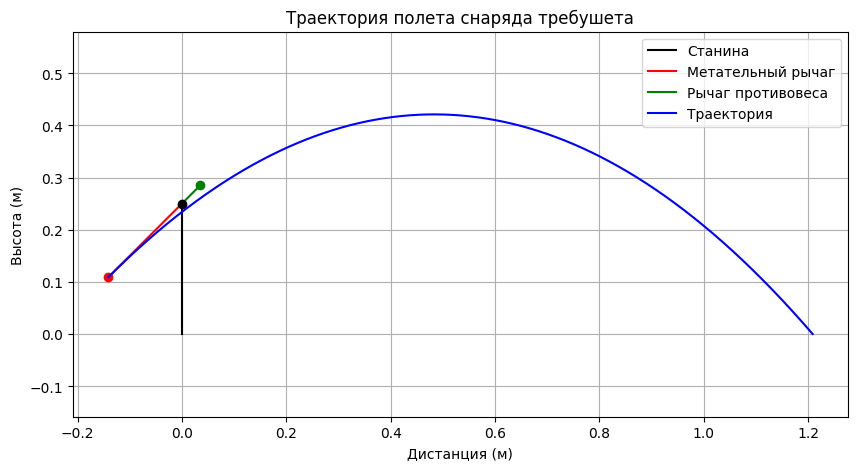

In [227]:
class Trebuchet:
    def __init__(self, arm_ratio, frame_height, arm_length):
        self.arm_ratio = arm_ratio          # Доля рычага, относящаяся к весу
        self.frame_height = frame_height    # Высота вала
        self.arm_length = arm_length        # Длина рычага
        self.missile_arm_length = arm_length * (1 - arm_ratio)
        self.weight_arm_length = arm_length * arm_ratio
        self.g = 9.80665
        self.missile_coordinates = None

    # def calculate_initial_velocity(self, R, h, angle):
    #     # Угол в радианах

    #     # Коеффициенты для квадратного уравнения
    #     a = 1
    #     b = -R * self.g * np.cos(angle) / (np.sin(2 * angle))
    #     c = (R**2) / (2 * np.sin(angle)**2) - h

    #     # Рассчитываем дискриминант
    #     D = b**2 - 4 * a * c

    #     if D < 0:
    #         raise ValueError("Нет решения: дискриминант меньше нуля. Попробуйте изменить расстояние, высоту или угол.")

    #     # Находим два корня
    #     v0_positive = (-b + np.sqrt(D)) / (2 * a)
    #     v0_negative = (-b - np.sqrt(D)) / (2 * a)

    #     # Возвращаем положительное значение скорости
    #     return max(v0_positive, v0_negative)

    def launch_parameters(self, distance, rad_angle):
        self.missile_x = -np.cos(rad_angle) * self.missile_arm_length
        self.missile_y = -np.sin(rad_angle) * self.missile_arm_length + self.frame_height

        self.weight_x = np.cos(rad_angle) * self.weight_arm_length
        self.weight_y = np.sin(rad_angle) * self.weight_arm_length + self.frame_height

        print(f"Missile start point: ({self.missile_x}; {self.missile_y})")
        print(f"Weight start point: ({self.weight_x}; {self.weight_y})")

        x_move = -self.missile_x + distance
        # v0 = math.sqrt((self.g * x_move ** 2) / (2 * (x_move + self.missile_y)))
        # v0 = math.sqrt((self.g * (x_move ** 2)) / (2 * (x_move * np.tan(rad_angle) + self.missile_y)))
        v0 = math.sqrt((self.g * x_move) / (np.sin(2 * rad_angle)) + 2 * self.missile_y * self.g * (np.cos(rad_angle) ** 2) / (np.sin(2 * rad_angle)))
        # v0 = self.calculate_initial_velocity(x_move, self.missile_y, rad_angle)

        print(f"Launching missile with angle: {np.degrees(rad_angle):.2f} degrees and v0: {v0:.2f} m/s")
        return v0, x_move

    def trajectory(self, v0, angle):
        v_y = v0 * np.sin(angle)
        v_x = v0 * np.cos(angle)
        print(f"Vx: {v_x}, Vy: {v_y}")

        # Время до достижения наивысшей точки
        first_path_time = v_y / self.g
        max_y = self.missile_y + v_y * first_path_time - 0.5 * self.g * (first_path_time ** 2)

        second_path_time = math.sqrt(2 * max_y / self.g)  # Время от высшей точки до падения
        total_time = first_path_time + second_path_time  # Общее время полета

        print(f"Flight time: {total_time} s, x_move: {v_x * total_time} m, y_move: {self.missile_y + v_y * total_time - 0.5 * self.g * (total_time)**2} m")

        t = np.linspace(0, total_time, num=10000)  # Временные точки
        x = self.missile_x + v_x * t  # Положение по x
        y = self.missile_y + v_y * t - 0.5 * self.g * t**2  # Положение по y

        # Ограничение y так, чтобы оно не было меньше 0
        y = np.maximum(0, y)
        return t, x, y

    def visualize(self, distance, angle=None):
        rad_angle = np.radians(angle % 90)
        v0, real_distance = self.launch_parameters(distance, rad_angle)
        t, x, y = self.trajectory(v0, rad_angle)

        plt.figure(figsize=(10, 5))
        plt.plot([0, 0], [0, self.frame_height], label='Станина', color="black")
        plt.plot([self.missile_x, 0], [self.missile_y, self.frame_height], label='Метательный рычаг', color='red')
        plt.plot([0, self.weight_x], [self.frame_height, self.weight_y], label='Рычаг противовеса', color='green')

        plt.plot(self.missile_x, self.missile_y, marker='o', color='red')
        plt.plot(0, self.frame_height, marker='o', color='black')
        plt.plot(self.weight_x, self.weight_y, marker='o', color='green')

        plt.plot(x, y, label='Траектория', color='blue')
        plt.xlabel('Дистанция (м)')
        plt.ylabel('Высота (м)')
        plt.title('Траектория полета снаряда требушета')

        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        # plt.xticks(np.arange(0, plt.xlim()[1], 0.1))
        plt.show()

trebuchet = Trebuchet(arm_ratio=0.2, frame_height=0.25, arm_length=0.25)
trebuchet.visualize(distance=1, angle=45)

Missile start point: (-0.3535533905932738; 0.6464466094067263)
Weight start point: (0.3535533905932738; 1.3535533905932737)
Launching missile with angle: 45.00 degrees and v0: 10.39 m/s
Vx: 7.344152435781817, Vy: 7.344152435781817
Flight time: 1.5811705269577754 s, x_move: 11.612357376943365 m, y_move: 1.7763568394002505e-15 m


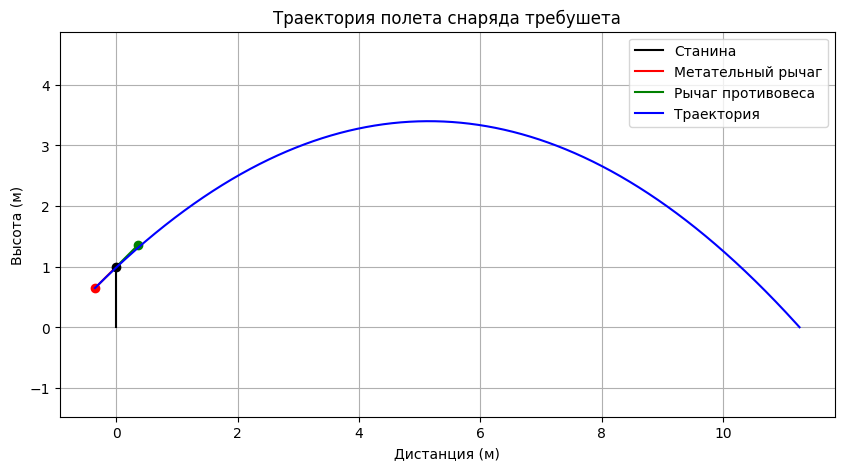

In [231]:
trebuchet = Trebuchet(arm_ratio=0.5, frame_height=1, arm_length=1)
trebuchet.visualize(distance=10, angle=45)